**ECO 7110  Econometrics II (Fall 2019)**

Send the solution (this notebook) to: econometrics.methods@gmail.com

1) Does economic growth reduce the odds of civil conflict? Miguel, Satyanath, and Sergenti (2004)
used an instrumental variables approach to assess the relationship between economic growth and
civil war.

**Data from:**
Miguel, Edward, Shanker Satyanath, and Ernest Sergenti. 2004. Economic Shocks and Civil Conflict: An Instrumental Variables Approach. Journal of Political Economy 112 (4): 725–753. 

**Variables for for civil war and rain instrument data**

**InternalConflict**:	Coded 1 if civil war with greater than 25 deaths; 0 otherwise

**LaggedGDPGrowth**:	Lagged GDP growth 

**InitialGDPpercap**: 	GDP per capita at the beginning of the period of analysis, 1979

**Democracy**:	A measure of democracy (called a “polity” score). Values range from –10 to 10

**Mountains**:	Percentage of the country that is mountainous terrain 

**EthnicFrac**:	Ethnic-linguistic fractionalization based on the Atlas Marodov Mira

**ReligiousFrac**:	Religious fractionalization

**LaggedRainfallGrowth**:	Lagged estimate of average precipitation in millimeters per year


In [0]:
import pandas as pd
file = "https://github.com/VitorKamada/ECO6100/raw/master/Data/RainIV.csv" 
df = pd.read_csv(file)

In [0]:
df.head(6)

,year,country_name,country_code,GPCP,RainfallGrowth,LaggedRainfallGrowth,war_prio,InternalConflict,pop,lpopl1,Mountains,lmtnest,Oil,EthnicFrac,ReligiousFrac,Democracy,GDPGrowth,LaggedGDPGrowth,InitialGDP,polity2l_6,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12,country13,country14,country15,country16,country17,country18,country19,country20,...,country_time22,country_time23,country_time24,country_time25,country_time26,country_time27,country_time28,country_time29,country_time30,country_time31,country_time32,country_time33,country_time34,country_time35,country_time36,country_time37,country_time38,country_time39,country_time40,country_time41,LaggedInternalConflict,yr1,yr2,yr3,yr4,yr5,yr6,yr7,yr8,yr9,yr10,yr11,yr12,yr13,yr14,yr15,yr16,yr17,yr18,yr19
0,1981,Guinea-Bissau,GNB,1339.0579,0.170644,-0.048803,0,0,824.0,6.695799,0.0,0.0,0,0.803757,0.545,-7,0.216561,-0.152878,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1982,Guinea-Bissau,GNB,1370.0729,0.023162,0.170644,0,0,839.0,6.714170,0.0,0.0,0,0.803757,0.545,-7,0.104712,0.216561,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1983,Guinea-Bissau,GNB,1075.4572,-0.215037,0.023162,0,0,854.0,6.732211,0.0,0.0,0,0.803757,0.545,-7,-0.042654,0.104712,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1984,Guinea-Bissau,GNB,1181.3462,0.098460,-0.215037,0,0,870.0,6.749931,0.0,0.0,0,0.803757,0.545,-7,0.034653,-0.042654,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1985,Guinea-Bissau,GNB,1203.2623,0.018552,0.098460,0,0,886.0,6.768493,0.0,0.0,0,0.803757,0.545,-8,0.036683,0.034653,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1986,Guinea-Bissau,GNB,1268.9373,0.054581,0.018552,0,0,903.0,6.786717,0.0,0.0,0,0.803757,0.545,-8,-0.035385,0.036683,0.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


(a)	Estimate a bivariate OLS model in which the occurrence of civil conflict is the dependent variable and lagged GDP growth is the independent variable. Comment on the results.

In [0]:
!pip install linearmodels
import numpy as np
import matplotlib.pyplot as plt
from linearmodels import IV2SLS, IVLIML, IVGMM
from statsmodels.api import OLS, add_constant
import statsmodels.formula.api as smf

In [0]:
ols1=smf.ols("InternalConflict~LaggedGDPGrowth",df).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:       InternalConflict   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1332
Date:                Sat, 12 Oct 2019   Prob (F-statistic):              0.715
Time:                        21:41:40   Log-Likelihood:                -448.98
No. Observations:                 743   AIC:                             902.0
Df Residuals:                     741   BIC:                             911.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2674      0.016     

Lagged GDP Growth has an insignificant impact on the occurance of civil conflict.

(b)	Add control variables for initial GDP, democracy, mountains, and ethnic and religious fractionalization to the model in part (a). Do these results establish a causal relationship between the economy and civil conflict?

In [0]:
ols2=smf.ols("InternalConflict~LaggedGDPGrowth+InitialGDP+Democracy+Mountains+EthnicFrac+ReligiousFrac",df).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:       InternalConflict   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     6.600
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           8.28e-07
Time:                        21:45:54   Log-Likelihood:                -429.58
No. Observations:                 743   AIC:                             873.2
Df Residuals:                     736   BIC:                             905.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0704      0.073     

Lagged GDP growth is still an insignificant factor in determining whether a country will have civil conflict, but initial GDP is significant.  

(c)	Consider lagged rainfall growth as an instrument for lagged GDP growth. What are the two conditions needed for a good instrument? Describe whether and how we test the two conditions. Provide appropriate statistical results.

The two conditions needed for a good instrument are that the instrument must be correlated with the endogenous variable it is an instrument for and that it cannot be correlated with the error term.  To test for correlation, we can run OLS with Lagged GDP Growth as the dependent variable and see if lagged rainfall growth has a significant coefficient:

In [0]:
firststage=smf.ols("LaggedGDPGrowth~LaggedRainfallGrowth+InitialGDP+Democracy+Mountains+EthnicFrac+ReligiousFrac",df).fit()
print(firststage.summary())

                            OLS Regression Results                            
Dep. Variable:        LaggedGDPGrowth   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.305
Date:                Sat, 12 Oct 2019   Prob (F-statistic):             0.0327
Time:                        23:21:36   Log-Likelihood:                 904.02
No. Observations:                 743   AIC:                            -1794.
Df Residuals:                     736   BIC:                            -1762.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0058 

Lagged Rainfall growth does in fact have a significant relationship with Lagged GDP growth.

The second criteria is not as easily testable.  However, it is reasonable to assume that rainfall can not be correlated with any excluded variables that might be in the error term.  Therefore, we can safely assume that Lagged Rainfall Growth passes both criteria of being a good instrument for Lagged GDP Growth.

(d)	Explain in your own words how instrumenting for GDP with rain could help us identify the causal effect of the economy on civil conflict. 

By using rainfall as an instrumental variable for GDP, we are effectively removing the irrelevant variation in GDP that might be correlated with the error term and are left with the direct and unbiased effect of lagged GDP growth on civil conflict.

(e)	Use the dependent and independent variables from part (b), but now instrument for lagged GDP growth with lagged rainfall growth. Comment on the results. 

In [0]:
Xs = ['InitialGDP','Democracy','Mountains','EthnicFrac','ReligiousFrac']
df['const'] = 1
Xs = ['const'] + Xs
ivmod = IV2SLS(df.InternalConflict, df[Xs],
  df.LaggedGDPGrowth, df.LaggedRainfallGrowth)
IV = ivmod.fit()
print(IV.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       InternalConflict   R-squared:                     -0.0506
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0592
No. Observations:                 743   F-statistic:                    45.810
Date:                Sat, Oct 12 2019   P-value (F-stat)                0.0000
Time:                        23:34:01   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
const               0.0625     0.0847     0.7377     0.4607     -0.1036      0.2286
InitialGDP         -0.0581     0

Lagged GDP Growth becomes more significant after using Lagged Rainfall Growth as an instrument, but it is still statistically insignificant in relation to civil conflict.

2) Are members of Congress more likely to meet with donors than with mere constituents? To answer this
question, Kalla and Broockman (2015) conducted a field experiment in which they had political activists
attempt to schedule meetings with 191 congressional offices regarding efforts to ban a potentially harmful
chemical. The messages the activists sent out were randomized. Some messages described the people
requesting the meeting as “local constituents,” and others described the people requesting the meeting as
“local campaign donors.”

**Data from:**
Kalla, Joshua L., and David E. Broockman. 2016. Congressional Officials Grant Access due to Campaign Contributions: A Randomized Field Experiment. American Journal of Political Science.

**Variables for Donor Experiment**

**treat_donor**: Dummy variable indicating that activists seeking meeting were identified as donors (1 = donors, 0 =
otherwise)

**staffrank**: Highest-ranking person attending the meeting: 0 for no one attended meeting, 1 for non-policy staff, 2 for
legislative assistant, 3 for legislative director, 4 for chief of staff, 5 for member of Congress


In [0]:
import pandas as pd
file = "https://github.com/VitorKamada/ECO6100/raw/master/Data/kalla-broockman-donor-access-2013-data.csv" 
df = pd.read_csv(file)

In [0]:
df.head()

,block,treat_donor,staffrank,mcID
0,38,0,1,1
1,64,0,2,2
2,54,0,0,3
3,43,0,2,4
4,36,0,2,5


(a)	Before we analyze the experimental data, let’s suppose we were to conduct an observational study of access based on a sample of Americans and we ran a regression in which the dependent variable indicates having met with a member of Congress and the independent variable was whether the individual donated money to a member of Congress. Would there be concerns about endogeneity? If so, why? 


Yes, there would be concerns about endogeneity.  Donating money is likely not the only factor that determines whether an individual meets with a member of Congress.  There could be plenty of people that donated money that were unable to meet with a member of Congress due to scheduling.  Also, members of Congress might be less likely to meet with donors if they don't want to give the impression that their power can be "bought".

(b)	Use a probit model to estimate the effect of the donor treatment condition on probability of meeting with a member of Congress. Interpret the results. 

In [0]:
df['Congress'] = np.where(df['staffrank'] == 5,1,0)
df.head()

,block,treat_donor,staffrank,mcID,Congress
0,38,0,1,1,0
1,64,0,2,2,0
2,54,0,0,3,0
3,43,0,2,4,0
4,36,0,2,5,0


In [0]:
from statsmodels.discrete.discrete_model import Probit
prob1 = Probit(df.Congress,df.treat_donor).fit()
prob1mef = prob1.get_margeff()
print(prob1mef.summary())

Optimization terminated successfully.
         Current function value: 0.552756
         Iterations 6
       Probit Marginal Effects       
Dep. Variable:               Congress
Method:                          dydx
At:                           overall
                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
treat_donor    -0.4455      0.050     -8.984      0.000      -0.543      -0.348


Donors are significantly less likely to meet with members of Congress based on the simple Probit regression.

(c)	What factors are missing from the model? What does this omission mean for our results? 

The model does not differentiate donors based on the amounts they donated.  This could significantly impact their chances for meeting with a member of Congress if the theory is that donations influence probability of a meeting with a Congress member.

(d)	Use a linear probability model (LPM) to make your estimate. Interpret the results. Assess the correlation of the fitted values from the probit and LPM models.

In [0]:
LPM = smf.ols("Congress~treat_donor",df).fit()
print(LPM.summary())

                            OLS Regression Results                            
Dep. Variable:               Congress   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.169
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0766
Time:                        00:45:21   Log-Likelihood:                 37.663
No. Observations:                 191   AIC:                            -71.33
Df Residuals:                     189   BIC:                            -64.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0236      0.018      1.333      

The results of the probit model are statistically significant, while the results of the Linear probability model are not.  According to the LPM, being a donor is not significantly correlated with meeting with a higher staff rank.

(e)	Use an LPM model to assess the probability of meeting with a senior staffer (defined as staffrank > 2). Interpret the results.

In [0]:
df['SeniorStaff'] = np.where(df['staffrank'] > 2,1,0)
LPM2 = smf.ols("SeniorStaff~treat_donor",df).fit()
print(LPM2.summary())

                            OLS Regression Results                            
Dep. Variable:            SeniorStaff   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     8.613
Date:                Sun, 13 Oct 2019   Prob (F-statistic):            0.00375
Time:                        00:51:06   Log-Likelihood:                -36.357
No. Observations:                 191   AIC:                             76.71
Df Residuals:                     189   BIC:                             83.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0551      0.026      2.111      

Donors are 13.24% more likely to meet with a senior staff member than non-donors.  The results are statistically significant.

3) In 1993, Georgia initiated a HOPE scholarship program to let state residents who had at least a B
average in high school attend public college in Georgia for free. The program is not need based.
Did the program increase college enrollment? Or did it simply transfer funds to families who
would have sent their children to college anyway? Dynarski (2000) used data on young people in
Georgia and neighboring states to assess this question

**Data from:**
Dynarski, Susan. 2000. Hope for Whom? Financial Aid for the Middle Class and Its Impact on College Attendance. National Tax Journal 53 (3, part 2): 629–662.

**Variables the HOPE Scholarship Data**

**InCollege**: A dummy variable equal to 1 if the individual is in college

**AfterGeorgia**: A dummy variable equal to 1 for Georgia residents after 1992

**Georgia**: A dummy variable equal to 1 if the individual is a Georgia resident

**After**: A dummy variable equal to 1 for observations after 1992

**Age**: Age

**Age18**: A dummy variable equal to 1 if the individual is 18 years old

**Black**: A dummy variable equal to 1 if the individual is African-American

**StateCode**: State codes

**Year**: Year of observation

**Weight**: Weight used in Dynarski (2000)


In [0]:
import pandas as pd
import numpy as np
file = "https://github.com/VitorKamada/ECO6100/raw/master/Data/HOPE_HW.csv" 
df = pd.read_csv(file)

In [0]:
df.head()

,StateCode,Age,Year,Weight,Age18,LowIncome,InCollege,After,Georgia,AfterGeorgia,Black
0,56,19,89,1396.0,0,1.0,1,0,0,0,0
1,56,19,89,1080.0,0,NaN,1,0,0,0,1
2,56,18,89,924.0,1,1.0,1,0,0,0,0
3,56,19,89,891.0,0,0.0,1,0,0,0,0
4,56,19,89,1395.0,0,NaN,0,0,0,0,0


(a)	Run a basic difference-in-difference model. What is the effect of the program?


In [0]:
DD = smf.ols("InCollege~After+Georgia+AfterGeorgia",df).fit()
print(DD.summary())

                            OLS Regression Results                            
Dep. Variable:              InCollege   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.681
Date:                Sun, 13 Oct 2019   Prob (F-statistic):             0.0453
Time:                        01:20:28   Log-Likelihood:                -3019.2
No. Observations:                4291   AIC:                             6046.
Df Residuals:                    4287   BIC:                             6072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4058      0.011     37.146   

The effect is not quite significant at the 5% level, but the simple diff-in-diff model indicates the program increased college enrollment by about 8.9%.

(b)	Calculate the percentage of people in the sample in college from the following four groups: (i) Before 1993/non-Georgia, (ii) Before 1993/Georgia, (iii) After 1992/non-Georgia, and (iv) After 1992/Georgia. First, use the mean function from Python. Second, use the coefficients from the OLS output in part (a).

The DiD regression above calculates the mean as the intercept.  The percentage calculations are as follows:

(i) Equal to intercept value of 0.4058 since both After and Georgia equal 0

(ii) Intercept (.4058) - Georgia coef (.1052) = .3005

(iii) Intercept (.4058) - After coef (.0045) = .4013

(iv) Intercept (.4058) - Georgia coef (.1052) - After coef (.0045) + AfterGeorgia coef (.0893) = 0.3854

These results are confirmed below.

In [0]:
df['InCollege'].count()

4291

In [0]:
Pre93nonGA = df[(df['Year'] < 93)]
Pre93nonGA = Pre93nonGA[(Pre93nonGA['Georgia'] == False)]
Pre93nonGA[(Pre93nonGA['InCollege']==1)]['Georgia'].count()/Pre93nonGA['Georgia'].count()

0.4057826520438684

In [0]:
Pre93GA = df[(df['Year'] < 93)]
Pre93GA = Pre93GA[(Pre93GA['Georgia'] == True)]
Pre93GA[(Pre93GA['InCollege']==1)]['Georgia'].count()/Pre93GA['Georgia'].count()

0.3005464480874317

In [0]:
Post92nonGA = df[(df['Year'] > 92)]
Post92nonGA = Post92nonGA[(Post92nonGA['Georgia'] == False)]
Post92nonGA[(Post92nonGA['InCollege']==1)]['Georgia'].count()/Post92nonGA['Georgia'].count()

0.4013230429988975

In [0]:
Post92GA = df[(df['Year'] > 92)]
Post92GA = Post92GA[(Post92GA['Georgia'] == True)]
Post92GA[(Post92GA['InCollege']==1)]['Georgia'].count()/Post92GA['Georgia'].count()

0.3854166666666667

(c)	Use panel data formulation for a difference-in-difference model to control for all year and state effects.

In [0]:
from linearmodels import PanelOLS
import statsmodels.api as sm
Year = pd.Categorical(df.Year)
StateCode = pd.Categorical(df.StateCode)
df = df.set_index(['StateCode', 'Year'])
df['StateCode'] = StateCode
df['Year'] = Year
exog_vars = ['AfterGeorgia']
exog = sm.add_constant(df[exog_vars])
panelmod = PanelOLS(df.InCollege, exog, entity_effects=True, 
 drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
print(panelmod)

                          PanelOLS Estimation Summary                           
Dep. Variable:              InCollege   R-squared:                        0.0008
Estimator:                   PanelOLS   R-squared (Between):             -0.4760
No. Observations:                4291   R-squared (Within):               0.0008
Date:                Sun, Oct 13 2019   R-squared (Overall):             -0.0025
Time:                        01:50:11   Log-likelihood                   -3004.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.3877
Entities:                           6   P-value                           0.0658
Avg Obs:                       715.17   Distribution:                  F(1,4284)
Min Obs:                       403.00                                           
Max Obs:                       1280.0   F-statistic (robust):          6.855e+28
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(d)	Add covariates for 18 year olds and African Americans to the panel data formulation. What is the effect of the HOPE program?

In [0]:
exog_vars = ['AfterGeorgia','Age18','Black']
exog = sm.add_constant(df[exog_vars])
panelmod = PanelOLS(df.InCollege, exog, entity_effects=True, 
 drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
print(panelmod)

                          PanelOLS Estimation Summary                           
Dep. Variable:              InCollege   R-squared:                        0.0191
Estimator:                   PanelOLS   R-squared (Between):             -0.6244
No. Observations:                4291   R-squared (Within):               0.0191
Date:                Sun, Oct 13 2019   R-squared (Overall):              0.0149
Time:                        01:59:01   Log-likelihood                   -2964.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      27.814
Entities:                           6   P-value                           0.0000
Avg Obs:                       715.17   Distribution:                  F(3,4282)
Min Obs:                       403.00                                           
Max Obs:                       1280.0   F-statistic (robust):         -1.359e+19
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The effect of the program is a 7.79% increase in college enrollment.  The result is statistically significant.

(e)	The way the program was designed, Georgia high school graduates with a B average or higher and annual family income greater than $50,000 could qualify for HOPE by filling out a simple one-page form. Those with lower income were required to apply for federal aid with a complex four-page form and had any federal aid deducted from their HOPE scholarship. Consider that Blacks are more likely to be lower income.  Run separate basic difference-in-difference models for these two groups and comment on the substantive implication of the results.  

In [0]:
exog_vars = ['AfterGeorgia','Black']
exog = sm.add_constant(df[exog_vars])
panelmod = PanelOLS(df.InCollege, exog, entity_effects=True, 
 drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
print(panelmod)

                          PanelOLS Estimation Summary                           
Dep. Variable:              InCollege   R-squared:                        0.0164
Estimator:                   PanelOLS   R-squared (Between):             -0.5873
No. Observations:                4291   R-squared (Within):               0.0164
Date:                Sun, Oct 13 2019   R-squared (Overall):              0.0124
Time:                        02:02:47   Log-likelihood                   -2970.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      35.634
Entities:                           6   P-value                           0.0000
Avg Obs:                       715.17   Distribution:                  F(2,4283)
Min Obs:                       403.00                                           
Max Obs:                       1280.0   F-statistic (robust):         -3.059e+19
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
exog_vars = ['AfterGeorgia','LowIncome']
exog = sm.add_constant(df[exog_vars])
panelmod = PanelOLS(df.InCollege, exog, entity_effects=True, 
 drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True)
print(panelmod)

                          PanelOLS Estimation Summary                           
Dep. Variable:              InCollege   R-squared:                        0.0844
Estimator:                   PanelOLS   R-squared (Between):              0.1618
No. Observations:                2967   R-squared (Within):               0.0844
Date:                Sun, Oct 13 2019   R-squared (Overall):              0.0856
Time:                        02:03:05   Log-likelihood                   -2001.0
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      136.42
Entities:                           6   P-value                           0.0000
Avg Obs:                       494.50   Distribution:                  F(2,2959)
Min Obs:                       277.00                                           
Max Obs:                       865.00   F-statistic (robust):          1.238e+17
                            

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/linearmodels/utility.py:478: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Low income is a substantially more significant predictor of college enrollment than being African-American.  After controlling for low income, the impact of the program actually became negative: students were 2.65% less likely to enroll in college after the HOPE program was implemented.

4) Congressional elections are decided by a clear rule: whoever gets the most votes in
November wins. Because virtually every congressional race in the United States is between
two parties, whoever gets more than 50 percent of the vote wins. We can use this fact to
estimate the effect of political party on ideology. Some argue that Republicans and
Democrats are very distinctive; others argue that members of Congress have strong
incentives to respond to the median voter in their districts, regardless of party. We can
assess how much party matters by looking at the ideology of members of Congress in the
112th Congress (which covered the years 2011 and 2012).

**Data from:**
Bailey, Michael A., Jon Mummolo, and Hans Noel. 2012. Tea Party Influence: A Story of Activists and Elites. American Politics Research 40(5): 769–804.

**Variables for Congressional Ideology Data**

**GOP2party2010**: The percent of the vote received by the Republican congressional candidate in the
district in 2010. Ranges from 0 to 1.

**GOPwin2010**: Dummy variable indicating Republican won; equals 1 if GOP2party2010 > 0.5 and
equals 0 otherwise.

**Ideology**: The conservativism of the member of Congress as measured by Carroll, Lewis, Lo,
Poole, and Rosenthal (2009, 2014). Ranges from –0.779 to 1.293. Higher value
indicate more conservative voting in Congress.

**ChildPoverty**: Percentage of district children living in poverty. Ranges from 0.03 to 0.49.

**MedianIncome**: Median income in the district. Ranges from \$23,291 to \$103,664.

**Obama2008**: Percent of vote for Barack Obama in the district in 2008 presidential election. Ranges
from 0.23 to 0.95.

**WhitePct**: Percent of the district that is non-Hispanic white. Ranges from 0.03 to 0.97.


In [0]:
import pandas as pd
file = "https://github.com/VitorKamada/ECO6100/raw/master/Data/CongressRD.csv" 
df = pd.read_csv(file)

In [0]:
df.head()

,ChildPoverty,MedianIncome,Obama2008,GOP2party2010,GOPwin2010,WhitePct,Ideology
0,0.27,39597.0,0.39,1.000,1.0,0.68,0.460
1,0.29,37289.0,0.36,0.511,1.0,0.67,0.443
2,0.25,38079.0,0.43,0.595,1.0,0.65,0.426
3,0.26,35719.0,0.23,1.000,1.0,0.90,0.467
4,0.19,43832.0,0.38,0.580,1.0,0.78,0.797


(a)	Suppose we try to explain congressional ideology as a function of political party only. Explain how endogeneity might be a problem.

A politician might change their ideology based on what they think will get them the most votes or benefit them the most.  Even if a Congress member is a Republican, they have an incentive to appeal to moderate voters to get more votes.  Congress members can also have views on certain issues that contradict their party's typical ideology, but still identify as part of that political party.  In this way, congressional ideology is endogenous to the function.  

(b)	How can an RD model fight endogeneity when we are trying to assess whether and how party affects congressional ideology?

By comparing the outcomes of conservative politicians who got close to 50% of the votes in their district, we can exploit the exogenous characteristics of the voting outcomes and find the local treatment effect.

(c)	Generate a scatterplot of congressional ideology against GOP2party and, based on this plot, discuss what you think the RD will indicate. 

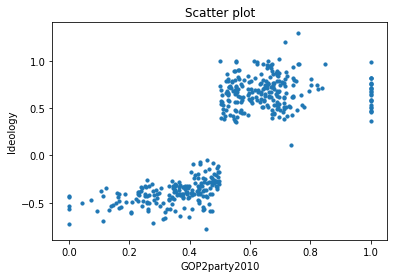

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(df.GOP2party2010, df.Ideology,s=10)
plt.title('Scatter plot')
plt.xlabel('GOP2party2010')
plt.ylabel('Ideology')
plt.show()

The scatterplot shows a clear postive relationship between a more conservative ideology and obtaining more votes as a GOP politician in 2010.  The RD function will show a clear effect that more conservative politicians will be more likely to be elected if they are part of the GOP.

(d)	Write down a basic RD model for this question and explain the terms. 

Ideology = B0 + B1GOP2party2010 + B2GOPwin2010

(e)	Estimate a basic RD model and interpret coefficients.

In [7]:
from statsmodels.api import OLS, add_constant
import statsmodels.formula.api as smf
RD = smf.ols("Ideology~GOP2party2010+GOPwin2010",df).fit()
print(RD.summary())

                            OLS Regression Results                            
Dep. Variable:               Ideology   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2686.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          2.47e-243
Time:                        01:17:44   Log-Likelihood:                 204.79
No. Observations:                 432   AIC:                            -403.6
Df Residuals:                     429   BIC:                            -391.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4751      0.022    -21.159

GOP politicians who won greater than 50% of the vote in 2010 had about a .99 higher conservative ideology than the GOP politicians who did not win at least 50% of the votes. The slope of the regression is .2304, which can be interpreted as conservatism increases by .02304 for every 10% increase in votes obtained by a GOP congressional candidate.

(f)	Create an adjusted assignment variable (equal to GOP2party2010 – 0.50) and use it to estimate a varying-slopes RD model and interpret the coefficients. 

In [8]:
df['GOP2party2010adj'] = df['GOP2party2010'] - .5
df.head()

,ChildPoverty,MedianIncome,Obama2008,GOP2party2010,GOPwin2010,WhitePct,Ideology,GOP2party2010adj
0,0.27,39597.0,0.39,1.000,1.0,0.68,0.460,0.500
1,0.29,37289.0,0.36,0.511,1.0,0.67,0.443,0.011
2,0.25,38079.0,0.43,0.595,1.0,0.65,0.426,0.095
3,0.26,35719.0,0.23,1.000,1.0,0.90,0.467,0.500
4,0.19,43832.0,0.38,0.580,1.0,0.78,0.797,0.080


In [21]:
RDadj = smf.ols("Ideology~GOP2party2010adj+GOPwin2010+GOP2party2010adj*GOPwin2010",df).fit()
print(RDadj.summary())

                            OLS Regression Results                            
Dep. Variable:               Ideology   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1868.
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.97e-245
Time:                        02:13:03   Log-Likelihood:                 213.78
No. Observations:                 432   AIC:                            -419.6
Df Residuals:                     428   BIC:                            -403.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The treatment value is about the same in this regression - GOP winners are .9816 higher on the conservative ideology scale than those who did not win. 

(g)	Assess whether there are discontinuities at GOPVote = 0.50 for ChildPoverty, MedianIncome, Obama2008, and WhitePct. Discuss the implications of your findings.

First, we can take a look at scatterplots to see if the discontinuities are obvious

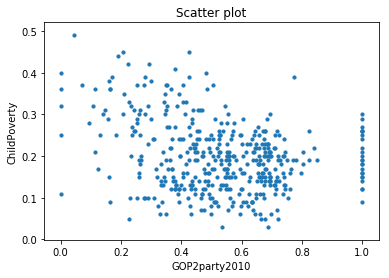

In [0]:
plt.scatter(df.GOP2party2010, df.ChildPoverty,s=10)
plt.title('Scatter plot')
plt.xlabel('GOP2party2010')
plt.ylabel('ChildPoverty')
plt.show()

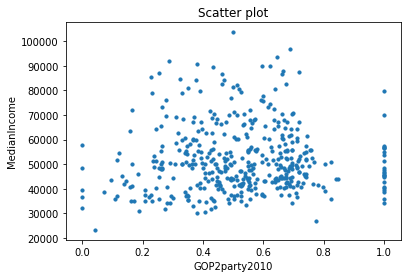

In [0]:
plt.scatter(df.GOP2party2010, df.MedianIncome,s=10)
plt.title('Scatter plot')
plt.xlabel('GOP2party2010')
plt.ylabel('MedianIncome')
plt.show()

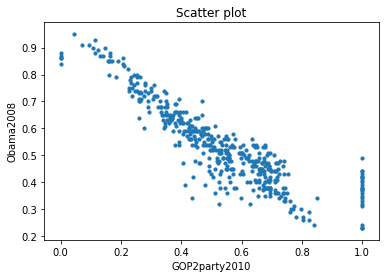

In [0]:
plt.scatter(df.GOP2party2010, df.Obama2008,s=10)
plt.title('Scatter plot')
plt.xlabel('GOP2party2010')
plt.ylabel('Obama2008')
plt.show()

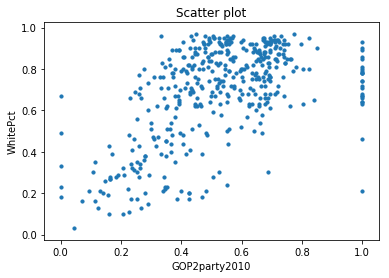

In [0]:
plt.scatter(df.GOP2party2010, df.WhitePct,s=10)
plt.title('Scatter plot')
plt.xlabel('GOP2party2010')
plt.ylabel('WhitePct')
plt.show()

There don't appear to be discontinuities for any of these variables based on the scatterplots. However, binning will give us a clearer picture. 

In [16]:
!pip install rdd
from rdd import rdd

  Created wheel for rdd: filename=rdd-0.0.3-cp36-none-any.whl size=4719 sha256=7e57a435d6d33e12c88e10d8537ff5b8afa8badd6cbbf9088c72c639e4881aab
  Stored in directory: /root/.cache/pip/wheels/d9/05/bb/ddeaae29aff613c6588736b4b0ee4c652b5ef7bddcb0d828f8
Successfully built rdd


In [0]:
data_rdd = rdd.truncated_data(df, 'GOP2party2010', 1, cut=0.5)

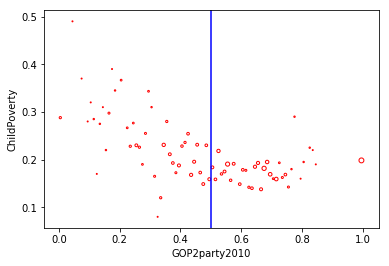

In [0]:
data_binned = rdd.bin_data(data_rdd, 'ChildPoverty', 'GOP2party2010', 100)

plt.scatter(data_binned['GOP2party2010'], data_binned['ChildPoverty'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=.5, color='b')
plt.xlabel('GOP2party2010')
plt.ylabel('ChildPoverty')
plt.show()
plt.close()

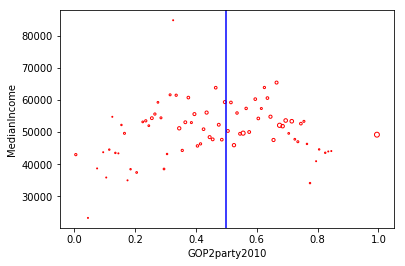

In [0]:
data_binned = rdd.bin_data(data_rdd, 'MedianIncome', 'GOP2party2010', 100)

plt.scatter(data_binned['GOP2party2010'], data_binned['MedianIncome'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=.5, color='b')
plt.xlabel('GOP2party2010')
plt.ylabel('MedianIncome')
plt.show()
plt.close()

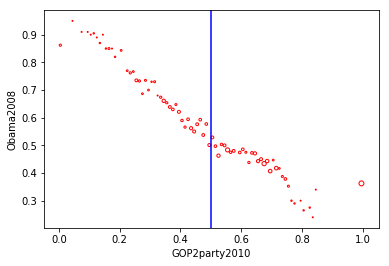

In [0]:
data_binned = rdd.bin_data(data_rdd, 'Obama2008', 'GOP2party2010', 100)

plt.scatter(data_binned['GOP2party2010'], data_binned['Obama2008'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=.5, color='b')
plt.xlabel('GOP2party2010')
plt.ylabel('Obama2008')
plt.show()
plt.close()

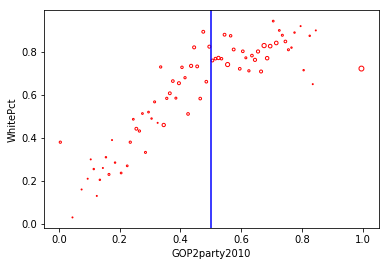

In [0]:
data_binned = rdd.bin_data(data_rdd, 'WhitePct', 'GOP2party2010', 100)

plt.scatter(data_binned['GOP2party2010'], data_binned['WhitePct'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=.5, color='b')
plt.xlabel('GOP2party2010')
plt.ylabel('WhitePct')
plt.show()
plt.close()

Binning makes it seem that there are slight discontinuities in ChildPoverty, MedianIncome, Obama2008, and WhitePct.  The discontinuity is most pronounced in WhitePct.  WhitePct clearly increases sharply as percentage of GOP vote increases, until the 50% mark where the slope is relatively flat around 80% WhitePct.

Now, let's do a more formal analysis.

In [10]:
RDchild = smf.ols("ChildPoverty~GOP2party2010+GOPwin2010",df).fit()
print(RDchild.summary())

                            OLS Regression Results                            
Dep. Variable:           ChildPoverty   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     21.46
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.30e-09
Time:                        01:38:40   Log-Likelihood:                 480.88
No. Observations:                 435   AIC:                            -955.8
Df Residuals:                     432   BIC:                            -943.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2567      0.012     21.504

In [11]:
RDinc = smf.ols("MedianIncome~GOP2party2010+GOPwin2010",df).fit()
print(RDinc.summary())

                            OLS Regression Results                            
Dep. Variable:           MedianIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2525
Date:                Thu, 24 Oct 2019   Prob (F-statistic):              0.777
Time:                        01:39:17   Log-Likelihood:                -4759.6
No. Observations:                 435   AIC:                             9525.
Df Residuals:                     432   BIC:                             9537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.086e+04   2036.612     24.972

In [12]:
RDobama = smf.ols("Obama2008~GOP2party2010+GOPwin2010",df).fit()
print(RDobama.summary())

                            OLS Regression Results                            
Dep. Variable:              Obama2008   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     837.7
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          2.16e-149
Time:                        01:39:56   Log-Likelihood:                 558.52
No. Observations:                 435   AIC:                            -1111.
Df Residuals:                     432   BIC:                            -1099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8529      0.010     85.406

In [13]:
RDwhite = smf.ols("WhitePct~GOP2party2010+GOPwin2010",df).fit()
print(RDwhite.summary())

                            OLS Regression Results                            
Dep. Variable:               WhitePct   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     97.10
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           1.49e-35
Time:                        01:40:40   Log-Likelihood:                 107.16
No. Observations:                 435   AIC:                            -208.3
Df Residuals:                     432   BIC:                            -196.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3985      0.028     14.138

Both Obama2008 and WhitePct have statistically significant discontinuities.

(h)	Estimate a varying-slopes model controlling for ChildPoverty, MedianIncome, Obama2008, and WhitePct. Discuss these results in light of your findings from part (g). 



In [14]:
RDall = smf.ols("Ideology~GOP2party2010+GOPwin2010+GOP2party2010*GOPwin2010+ChildPoverty+MedianIncome+Obama2008+WhitePct",df).fit()
print(RDall.summary())

                            OLS Regression Results                            
Dep. Variable:               Ideology   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     879.6
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          5.70e-248
Time:                        01:43:47   Log-Likelihood:                 234.58
No. Observations:                 432   AIC:                            -453.2
Df Residuals:                     424   BIC:                            -420.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The treatment effect is about .07 higher when controlling for the additional variables.  Obama2008 and WhitePct were biasing the results downward previously.

(i)	Estimate a varying-slopes model with a window of GOP vote share from 0.4 to 0.6. Discuss any meaningful differences in coefficients and standard errors from the earlier varying-slopes model.

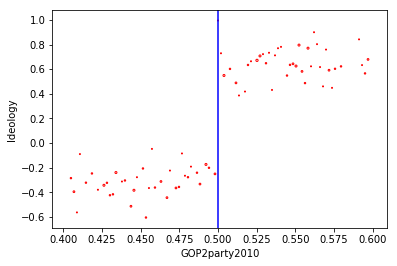

In [19]:
data_rdd2 = rdd.truncated_data(df, 'GOP2party2010', .1, cut=0.5)
data_binned = rdd.bin_data(data_rdd2, 'Ideology', 'GOP2party2010', 100)

plt.scatter(data_binned['GOP2party2010'], data_binned['Ideology'],
    s = data_binned['n_obs'], facecolors='none', edgecolors='r')
plt.axvline(x=.5, color='b')
plt.xlabel('GOP2party2010')
plt.ylabel('Ideology')
plt.show()
plt.close()

In [18]:
RDtrunc = smf.ols("Ideology~GOP2party2010+GOPwin2010+GOP2party2010*GOPwin2010+ChildPoverty+MedianIncome+Obama2008+WhitePct",data_rdd2).fit()
print(RDtrunc.summary())

                            OLS Regression Results                            
Dep. Variable:               Ideology   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     255.5
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           3.26e-78
Time:                        01:48:20   Log-Likelihood:                 85.330
No. Observations:                 153   AIC:                            -154.7
Df Residuals:                     145   BIC:                            -130.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The treatment result is no longer statistically significant at the 5% level(barely), but the coefficient increased greatly by .15 compared to the result from the model that used the full range of vote percentages.

(j)	Which estimate is the most credible?

The result with the window of GOP vote share from .4 to .6 is most credible because it compares similar, moderate districts instead of including outliers in the regression that may skew the results.  